# Medical Data Visualizer

## Step 1: Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Step 2: Loading the Data

In [4]:
df = pd.read_csv('medical_examination.csv')
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Step 3: Adding the 'overweight' Column

In [5]:
# A person is overweight if their BMI > 25.
# BMI = weight (kg) / height (m)^2
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2) > 25
df['overweight'] = df['overweight'].astype(int)


## Step 4: Normalizing 'cholesterol' and 'gluc'

In [6]:
# Values of 1 mean normal, so you convert:
# 1 → 0 (good)
# 1 → 1 (bad)
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)


## Step 5: Creating Categorical Plot

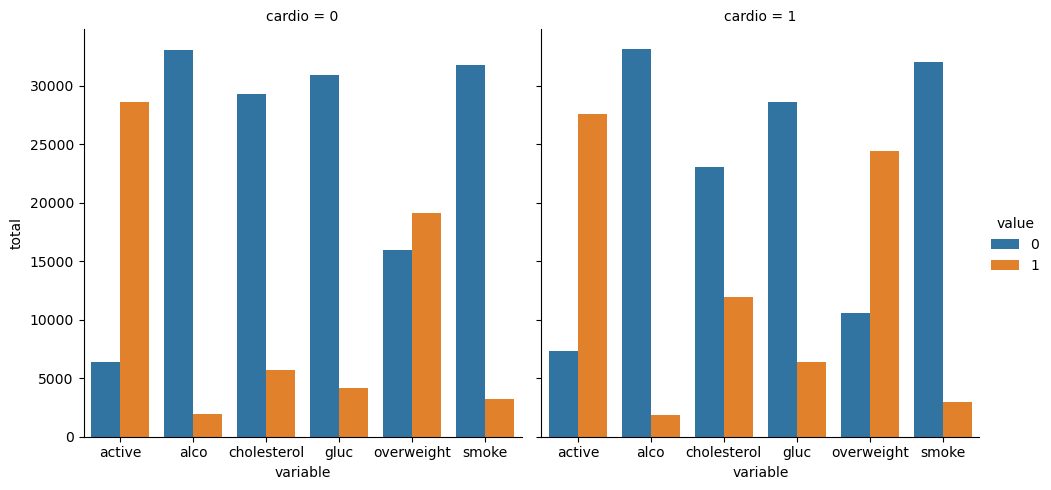

In [7]:
# Ising Seaborn's catplot() to show the counts of features (like smoking, drinking, cholesterol, etc.) grouped by cardiovascular disease.
## 1. Prepare the data using pd.melt():
df_cat = pd.melt(df, 
                 id_vars=['cardio'], 
                 value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

## 2. Group and count values:
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

## 3. Plot using seaborn.catplot:
sns.catplot(x='variable', y='total', hue='value', col='cardio', 
            data=df_cat, kind='bar')
plt.show()


## Step 6: Creating Heatmap

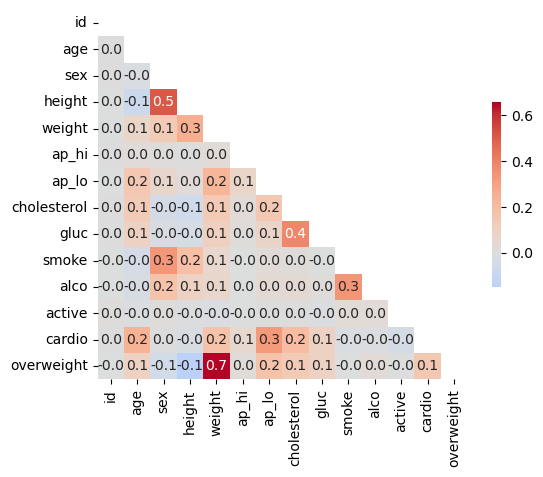

In [8]:
# 1. Clean the data by removing invalid entries:
    # ap_lo (diastolic) must not be greater than ap_hi (systolic)
    # Height and weight must be within 2.5th and 97.5th percentiles
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]

# 2. Compute the correlation matrix:
corr = df_heat.corr()

# 3. Generate a mask for the upper triangle:
import numpy as np
mask = np.triu(np.ones_like(corr, dtype=bool))

# 4. Draw the heatmap:
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", center=0, cmap="coolwarm", square=True, cbar_kws={"shrink": 0.5})
plt.show()




## Step 7: Saving Plots

In [9]:
def draw_cat_plot():
    # ... same code ...
    fig = plot.fig
    fig.savefig('catplot.png')
    return fig

def draw_heat_map():
    # ... same code ...
    fig = plt.gcf()
    fig.savefig('heatmap.png')
    return fig
